# NLP Project - spam-ham detction

## Getting the Data

Dataset has been takenfrom the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)
The file contains a collection of more than 5 thousand SMS phone messages.

A collection of texts is also sometimes called "corpus". Let's print the first ten messages and number them using **enumerate**:

In [1]:
import pandas as pd

We'll use **read_csv** and make note of the **sep** argument, we can also specify the desired column names by passing in a list of *names*.

In [2]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [3]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Using **groupby** to get some head for our feature engineering that separate ham and spam!

In [4]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Feature Engineering:

In [5]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

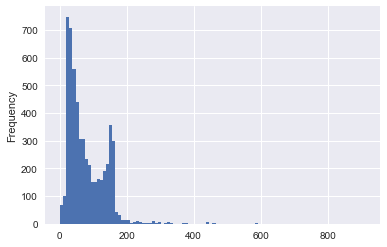

In [7]:
messages['length'].plot(bins=100, kind='hist') 

Text length may be a good feature to think about!

In [8]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Woah! 910 characters of a message ?

In [9]:
print(messages[messages['length'] == 910]['message'].iloc[0])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


Some sort of Romeo sending texts!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182457E6CC0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001824592A2B0>], dtype=object)

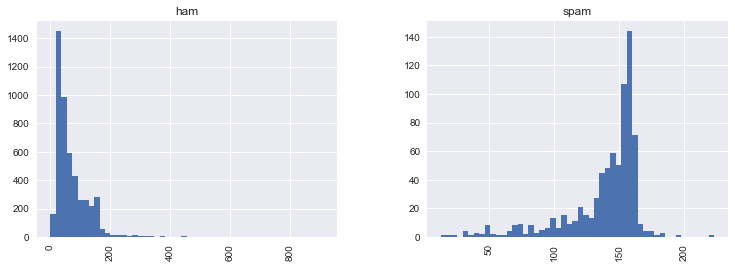

In [10]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

By basic EDA we discover a trend that spam messages tend to have more characters.

## Text Pre-processing

As a first step,we make a function that will split a message into its individual words and return a list. Also remove very common words called stopwords, ('the', 'a', etc..). For this, we will take advantage of the NLTK library.

For removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [15]:
import string
from nltk.corpus import stopwordswords

In [18]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Original DataFrame again:

In [19]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Tokenization - converting a string text into a list of tokens (words that we aactually want):

In [20]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

Currently, we have the messages as lists of tokens and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

We use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents.

Since there are so many messages, we will get a lot of zero counts for the presence of that word in that document and hence SciKit Learn will output this as a Sparse Matrix.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we specify the **analyzer** to be our own previously defined function:

After the counting, the term weighting and normalization can be done using scikit-learn's `TfidfTransformer`.


**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

*The above theory is taken from the internet*

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

## Training a model

With messages represented as vectors, we now finally train our spam/ham classifier.
We'll be using scikit-learn's Naive Bayes clasifier here.

In [23]:
from sklearn.naive_bayes import MultinomialNB

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


## Creating a Data Pipeline

We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This allows us to set up all the transformations that we will do to the data for future use.

In [25]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [26]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000182483D2510>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [27]:
predictions = pipeline.predict(msg_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.97      0.98       989
       spam       0.79      1.00      0.88       126

avg / total       0.98      0.97      0.97      1115



In [31]:
print(confusion_matrix(predictions, label_test))

[[955  34]
 [  0 126]]


## Hence, we are able to calssify 98% of the messages correctly into spam and ham !